In [1]:
# get histograms to try to detect changes: start with age

In [2]:
import json
import pandas as pd

from src.inout.load_omop import OMOP_data

In [3]:
csv_folder_path = './data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv'

with open('./data/OMOP_structure_and_types/OMOPCDM_5.3_structure.json', 'r') as f:
    tables_structure = json.load(f)

omop_db = OMOP_data(csv_data_path=csv_folder_path, tables_structure=tables_structure)

Ingesting clinical_tables:
Ingesting table person.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/person.csv was successful.
Ingesting table observation_period.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/observation_period.csv was successful.
Ingesting table death.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/death.csv was successful.
Ingesting table visit_occurrence.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/visit_occurrence.csv was successful.
Ingesting table visit_detail.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/visit_detail.csv was successful.
Ingesting table condition_occurrence.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/condition_occurrence.csv was successful.
Ingesting table drug_exposure.
Ingestin

In [4]:
age_of_visit_patients_df = omop_db.clinical_tables.visit_occurrence[['person_id','visit_start_date']]\
    .join(omop_db.clinical_tables.person[['person_id','year_of_birth']].set_index('person_id'),
          on='person_id',
          rsuffix='_person')
age_of_visit_patients_df['year'] = age_of_visit_patients_df['visit_start_date'].dt.year
age_of_visit_patients_df['patient_age'] = age_of_visit_patients_df['year']-age_of_visit_patients_df['year_of_birth']
age_of_visit_patients_df.sort_values(by="visit_start_date")

,person_id,visit_start_date,year_of_birth,year,patient_age
305,4985579811051920670,2110-01-04,2064,2110,46
204,4985579811051920670,2110-04-08,2064,2110,46
663,4985579811051920670,2110-04-11,2064,2110,46
262,4985579811051920670,2110-04-17,2064,2110,46
254,4985579811051920670,2110-05-03,2064,2110,46
...,...,...,...,...,...
623,-2500070523286875699,2201-07-07,2134,2201,67
452,3129727379702505063,2201-08-12,2145,2201,56
708,2341788304019377091,2201-10-30,2130,2201,71
717,2341788304019377091,2201-12-11,2130,2201,71


In [5]:
monthly_age_visit_count_df = age_of_visit_patients_df.groupby([pd.Grouper(key='visit_start_date',freq='ME'),'patient_age'])['patient_age'].count().reset_index(name='count')
monthly_age_visit_count_df['year'] = monthly_age_visit_count_df['visit_start_date'].dt.year 
monthly_age_visit_count_df['month'] = monthly_age_visit_count_df['visit_start_date'].dt.month
monthly_age_visit_count_df.sort_values(by='visit_start_date').head(20)

,visit_start_date,patient_age,count,year,month
0,2110-01-31,46,1,2110,1
1,2110-04-30,46,3,2110,4
2,2110-05-31,46,2,2110,5
3,2110-06-30,46,1,2110,6
4,2110-07-31,46,1,2110,7
5,2110-11-30,26,1,2110,11
6,2111-01-31,78,2,2111,1
7,2111-02-28,47,1,2111,2
8,2111-05-31,47,1,2111,5
9,2111-06-30,47,1,2111,6


In [6]:
yearly_age_visit_count_df = monthly_age_visit_count_df.groupby(['year','patient_age'])['count'].sum().reset_index(name='count')
yearly_age_visit_count_df

,year,patient_age,count
0,2110,26,1
1,2110,46,8
2,2111,47,7
3,2111,52,2
4,2111,78,2
...,...,...,...
206,2200,66,6
207,2201,56,4
208,2201,67,1
209,2201,71,3


In [7]:
abs_freq_table =yearly_age_visit_count_df.pivot(index=['year'], columns='patient_age',values='count').fillna(int(0))#, downcast='infer')
abs_freq_table

patient_age,21,26,28,29,31,32,33,34,38,40,...,83,84,85,86,87,88,89,91,92,93
year,,,,,,,,,,,,,,,,,,,,,
2110,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2114,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
rel_freq_table = abs_freq_table.div(abs_freq_table.sum(axis=1), axis= 0)
rel_freq_table

patient_age,21,26,28,29,31,32,33,34,38,40,...,83,84,85,86,87,88,89,91,92,93
year,,,,,,,,,,,,,,,,,,,,,
2110,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
alpha = 0.5

current_hist = rel_freq_table.iloc[0]
current_hist


patient_age
21         0.0
26    0.111111
28         0.0
29         0.0
31         0.0
        ...   
88         0.0
89         0.0
91         0.0
92         0.0
93         0.0
Name: 2110, Length: 62, dtype: Float64

In [10]:
def alpha_summing_stats(current_hist:pd.Series, previous_stats:pd.Series, alpha=0.5) -> pd.Series:
    damped_hist, damped_sum = current_hist*alpha, (current_hist*alpha).sum()
    return (damped_hist + previous_stats)/(1+ alpha)# damped_sum)

In [11]:
alpha_fading_stat_df = pd.DataFrame(columns=rel_freq_table.columns)
current_hist = rel_freq_table.iloc[0]
alpha_fading_stat_df.loc[current_hist.name] = current_hist
for i in range(1, rel_freq_table.shape[0]):
    new_stats = alpha_summing_stats(current_hist, rel_freq_table.iloc[i],alpha=0.5)
    current_hist.name = rel_freq_table.iloc[i].name
    alpha_fading_stat_df.loc[current_hist.name] =  new_stats
    current_hist = new_stats

In [12]:
alpha_fading_stat_df

patient_age,21,26,28,29,31,32,33,34,38,40,...,83,84,85,86,87,88,89,91,92,93
2110,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2111,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2112,0.0,0.012346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2113,0.0,0.004115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2114,0.0,0.001372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.039216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00002,0.0,0.0,0.0,0.0,0.0,0.0
2199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000007,0.0,0.0,0.0,0.0,0.0,0.0
2200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,0.0
2201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
alpha_fading_stat_df.sum(axis=1)

2110    1.0
2111    1.0
2112    1.0
2113    1.0
2114    1.0
       ... 
2198    1.0
2199    1.0
2200    1.0
2201    1.0
2202    1.0
Length: 81, dtype: Float64

<Axes: ylabel='patient_age'>

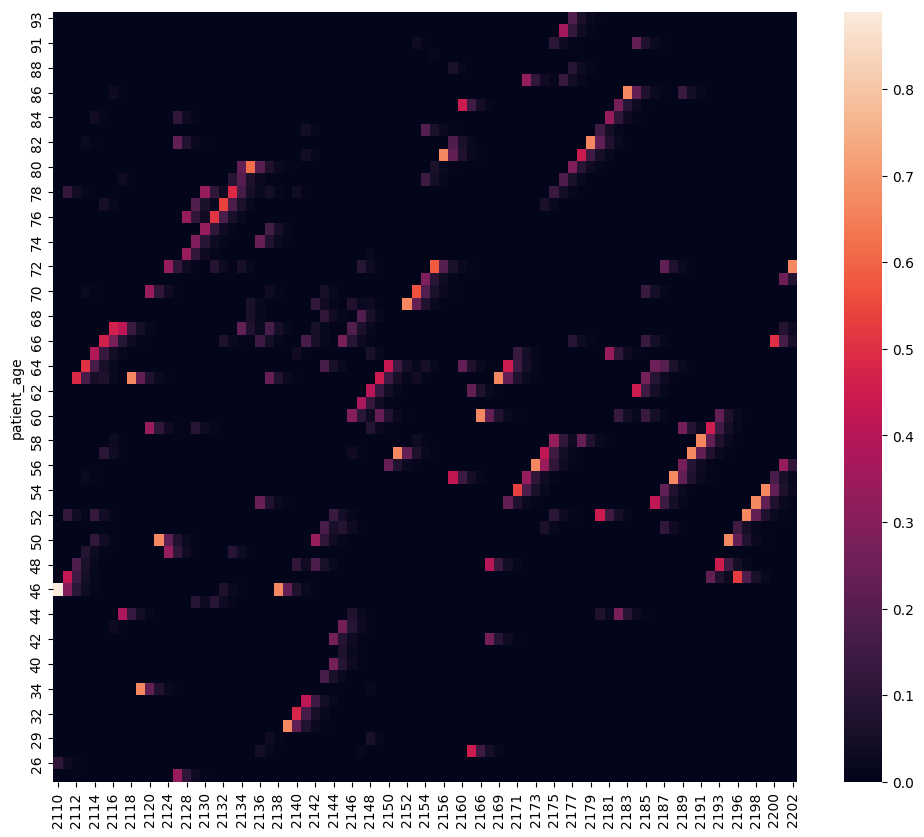

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(alpha_fading_stat_df.astype('float').T.sort_index(ascending=False), ax=ax)

In [15]:
alpha_fading_stat_df.astype('float')

patient_age,21,26,28,29,31,32,33,34,38,40,...,83,84,85,86,87,88,89,91,92,93
2110,0.000000e+00,1.111111e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2111,0.000000e+00,3.703704e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2112,0.000000e+00,1.234568e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2113,0.000000e+00,4.115226e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2114,0.000000e+00,1.371742e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,3.921569e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,2.912324e-31,6.088946e-38,7.195461e-16,5.538918e-22,3.095457e-25,6.706823e-25,1.741194e-24,1.846299e-22,6.268300e-24,3.008784e-23,...,1.147189e-09,7.743524e-09,1.858446e-08,2.046149e-05,1.198118e-11,2.731403e-11,3.210826e-19,1.393866e-07,3.476330e-11,5.462804e-11
2199,9.707747e-32,2.029649e-38,2.398487e-16,1.846306e-22,1.031819e-25,2.235608e-25,5.803982e-25,6.154331e-23,2.089433e-24,1.002928e-23,...,3.823963e-10,2.581175e-09,6.194820e-09,6.820496e-06,3.993726e-12,9.104677e-12,1.070275e-19,4.646221e-08,1.158777e-11,1.820935e-11
2200,3.235916e-32,6.765496e-39,7.994957e-17,6.154353e-23,3.439396e-26,7.452026e-26,1.934661e-25,2.051444e-23,6.964778e-25,3.343093e-24,...,1.274654e-10,8.603916e-10,2.064940e-09,2.273499e-06,1.331242e-12,3.034892e-12,3.567584e-20,1.548740e-08,3.862589e-12,6.069782e-12
2201,1.078639e-32,2.255165e-39,2.664986e-17,2.051451e-23,1.146465e-26,2.484009e-26,6.448868e-26,6.838146e-24,2.321593e-25,1.114364e-24,...,4.248847e-11,2.867972e-10,6.883133e-10,7.578329e-07,4.437473e-13,1.011631e-12,1.189195e-20,5.162468e-09,1.287530e-12,2.023261e-12


In [16]:
alpha_fading_stat_df.iloc[0]

patient_age
21         0.0
26    0.111111
28         0.0
29         0.0
31         0.0
        ...   
88         0.0
89         0.0
91         0.0
92         0.0
93         0.0
Name: 2110, Length: 62, dtype: Float64

In [17]:
# JSD dstance of two pd.Series histograms:

from tqdm import tqdm
import numpy as np

from scipy.stats import entropy, beta


def JSD_distance(ref_hist: pd.Series, new_hist: pd.Series):
    P_i, P_j = ref_hist.to_numpy(), new_hist.to_numpy()
    M = (P_i + P_j)/2
    return np.sqrt((entropy(P_i,M, base=2)+entropy(P_j,M, base=2))/2)

In [18]:
JSD_distance(alpha_fading_stat_df.iloc[2], alpha_fading_stat_df.iloc[3])

0.6776045432457227

In [19]:
# Beta dist estimator

def geo_mean(iterable):
    return np.exp(np.log(iterable).mean())

def iter_geo_mean_estimator(new_value: float, order: int, previous_value:float|None = None):
    if order == 1 and previous_value is None:
        return new_value
    else:
        return ((previous_value**(i-1))*new_value)**(1/order)


In [20]:
dist_list = []
for i in range(0, rel_freq_table.shape[0]):
    dist_list.append(JSD_distance(alpha_fading_stat_df.iloc[0], alpha_fading_stat_df.iloc[i]))
dist_list

[0.0,
 0.6776045432457228,
 0.8599109793754232,
 0.9406068248230592,
 0.9756561130626997,
 0.9903126745821164,
 0.9962365880855973,
 0.9985657567578051,
 0.9994617319442277,
 0.9998004755200403,
 0.9999267855284943,
 0.9999733589362511,
 0.999990374122014,
 0.9999965428513995,
 0.9999987647743066,
 0.9999995606435714,
 0.9999998443429805,
 0.9999999450460304,
 0.9086169346995328,
 0.9615814016851645,
 0.9844051021398166,
 0.9938473996250725,
 0.9976267767350258,
 0.999100782513402,
 0.48337931146731566,
 0.7738820630597939,
 0.9008910420492988,
 0.9581799293268598,
 0.982971957924485,
 0.9932654479062651,
 0.9973972504707767,
 0.9990122925636558,
 0.9996305950004057,
 0.9998634563064316,
 0.9999500131517179,
 0.9999818465768238,
 0.999993451760452,
 0.9999976515470731,
 0.9999991619459766,
 0.9999997022364137,
 0.9999998946080406,
 0.999999962823535,
 0.9999999869259074,
 0.9999999954146566,
 0.9999999983957814,
 0.9999999994400034,
 0.9999999998049155,
 0.9999999999321655,
 0.99999999

In [21]:
def estimate_beta_parameters(new_value: float, order:int, old_dist_geo_mean:float, old_complementary_dist_geo_mean:float):
    
    if order ==1: #or new_dist_geo_mean==0 or new_complementary_dist_geo_mean==1:
        return None, None, new_value, 1-new_value
    else:    
        new_dist_geo_mean = iter_geo_mean_estimator(new_value, order, old_dist_geo_mean)
        # print(new_dist_geo_mean)
        new_complementary_dist_geo_mean = iter_geo_mean_estimator(1-new_value, order, old_complementary_dist_geo_mean)
        # print(new_complementary_dist_geo_mean)
        est_alpha = 1/2*(1+new_dist_geo_mean/(1-new_dist_geo_mean-new_complementary_dist_geo_mean))
        est_beta =  1/2*(1+new_complementary_dist_geo_mean/(1-new_dist_geo_mean-new_complementary_dist_geo_mean))
        return est_alpha, est_beta, new_dist_geo_mean, new_complementary_dist_geo_mean

In [22]:
# Reset parameters:
est_alpha, est_beta, new_dist_geo_mean, new_complementary_dist_geo_mean = estimate_beta_parameters(0.0, 1.0, 0, 1)

ref_PDF = alpha_fading_stat_df.iloc[0]
i=1

est_alpha, est_beta, new_dist_geo_mean, new_complementary_dist_geo_mean 

(None, None, 0.0, 1.0)

In [23]:
# 
current_PDF = alpha_fading_stat_df.iloc[i]
current_order = 1
current_dist = JSD_distance(ref_PDF, current_PDF)

In [24]:
current_dist

0.6776045432457228

In [25]:
# get Beta parameters given new observation:
est_alpha, est_beta, new_dist_geo_mean, new_complementary_dist_geo_mean = estimate_beta_parameters(current_dist, current_order, new_dist_geo_mean, new_complementary_dist_geo_mean)
est_alpha, est_beta, new_dist_geo_mean, new_complementary_dist_geo_mean

(None, None, 0.6776045432457228, 0.32239545675427717)

In [26]:
1/2*(1+new_dist_geo_mean/(1-new_dist_geo_mean-new_complementary_dist_geo_mean))

/tmp/ipykernel_96705/431255923.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  1/2*(1+new_dist_geo_mean/(1-new_dist_geo_mean-new_complementary_dist_geo_mean))


inf

In [27]:
i=2
current_PDF = alpha_fading_stat_df.iloc[i]
current_order = 2
current_dist = JSD_distance(ref_PDF, current_PDF)
current_dist

0.8599109793754232

In [28]:
est_alpha, est_beta, new_dist_geo_mean, new_complementary_dist_geo_mean = estimate_beta_parameters(current_dist, current_order, new_dist_geo_mean, new_complementary_dist_geo_mean)
est_alpha, est_beta, new_dist_geo_mean, new_complementary_dist_geo_mean

(16.305927024169314,
 4.900495456266923,
 0.7633345180271005,
 0.21251838459418002)

In [29]:
z1, z2, z3 = 0.68, 0.95, 0.997
u1, u2, u3 = map(lambda x: beta.ppf(x, est_alpha, est_beta), [z1, z2, z3])
u1, u2, u3

(0.8180725107153629, 0.9003965731105843, 0.9510047064973591)

In [30]:
i=3
current_PDF = alpha_fading_stat_df.iloc[i]
current_order = i
current_dist = JSD_distance(ref_PDF, current_PDF)
current_dist

0.9406068248230592

In [31]:
est_alpha, est_beta, new_dist_geo_mean, new_complementary_dist_geo_mean = estimate_beta_parameters(current_dist, current_order, new_dist_geo_mean, new_complementary_dist_geo_mean)
est_alpha, est_beta, new_dist_geo_mean, new_complementary_dist_geo_mean

(10.084515226108309,
 2.1272990111974712,
 0.8183629821909777,
 0.13894508384653304)

In [32]:
z1, z2, z3 = 0.68, 0.95, 0.997
u1, u2, u3 = map(lambda x: beta.ppf(x, est_alpha, est_beta), [z1, z2, z3])

In [33]:
u1, u2, u3

(0.8885456865052078, 0.9623899787608264, 0.990771910224888)

In [34]:
from tqdm import tqdm
import numpy as np

from scipy.stats import entropy, beta

# acessory functions:

def JSD_distance(ref_hist: pd.Series, new_hist: pd.Series):
    P_i, P_j = ref_hist.to_numpy(), new_hist.to_numpy()
    M = (P_i + P_j)/2
    return np.sqrt((entropy(P_i,M, base=2)+entropy(P_j,M, base=2))/2)

def geo_mean(iterable):
    return np.exp(np.log(iterable).mean())

def iter_geo_mean_estimator(new_value: float, order: int, previous_value:float|None = None):
    if order == 1 and previous_value is None:
        return new_value
    else:
        return ((previous_value**(order-1))*new_value)**(1/order)
    
    


In [35]:
from enum import Enum

class ControlState(Enum):
    
    IN_CONTROL=0
    WARNING=1
    OUT_OF_CONTROL=2

In [36]:
# change detection class #

class PDFChangeDetector:
    def __init__(self, a_memory:float=0.5, z1=0.68, z2=0.95, z3=0.997) -> None:
        
        #quantile parameters
        self._z1 = z1
        self._z2 = z2
        self._z3 = z3
        
        # alpha fading memory parameter and attributes
        self.a_memory:float = a_memory
        self._alpha_fading_pdf:pd.Series|None = None
        
        # Beta distribution parameters
        self._estimated_alpha:float|None = None
        self._estimated_beta:float|None = None
        
        # Stochastic process parameters and attributes
        self._run_order = 1
        
        self._reference_PDF = None
        
        self._dist_geo_mean:float|None = None
        self._complementary_dist_geo_mean:float|None = None
        
        self._min_u1 = None
        self._min_u2 = None
        self._min_u3 = None
        
        
        
    def _update_alpha_fading_pdf(self, 
                            current_pdf:pd.Series
                            ) -> None:
        damped_hist, damped_sum = self._alpha_fading_pdf*self.a_memory, (self._alpha_fading_pdf*self.a_memory).sum()
        self._alpha_fading_pdf = (damped_hist + self._alpha_fading_pdf)/(1+damped_sum)
        
    @property
    def alpha_fading_pdf(self) -> pd.Series|None:
        return self._alpha_fading_pdf
        
    def _update_beta_distribution_parameters(self,
                                new_dist: float, 
                                # order:int, 
                                # old_dist_geo_mean:float, 
                                # old_complementary_dist_geo_mean:float
                                ) -> None:
        
        if self._run_order == 1:
            self._dist_geo_mean, self._complementary_dist_geo_mean = new_dist, 1-new_dist
        else:    
            self._update_geo_mean_estimators(new_dist)
            self._estimated_alpha = 1/2*(1+self._dist_geo_mean/(1-self._dist_geo_mean-self._complementary_dist_geo_mean))
            self._estimated_beta =  1/2*(1+self._complementary_dist_geo_mean/(1-self._dist_geo_mean-self._complementary_dist_geo_mean))
        print("new alpha:", self._estimated_alpha, "  new beta:", self._estimated_beta)
        print("geo_mean:", self._dist_geo_mean, "  complementary geo_mean:", self._complementary_dist_geo_mean)
            
    def _reset_detector_parameters(self, ref_PDF:pd.Series) -> None:
        self._estimated_alpha = None
        self._estimated_beta = None
        self._dist_geo_mean = None
        self._complementary_dist_geo_mean = None
        self._run_order = 1
        self._alpha_fading_pdf = None
        self._reference_PDF = ref_PDF
        self._alpha_fading_pdf = ref_PDF
        self._min_u1, self._min_u2, self._min_u3 = None, None, None
        
    def _update_geo_mean_estimators(self, new_dist: float) ->None:
        self._dist_geo_mean, self._complementary_dist_geo_mean = (
            iter_geo_mean_estimator(x1, self._run_order, x2) for x1, x2 in
            [(new_dist, self._dist_geo_mean), (1-new_dist, self._complementary_dist_geo_mean)]
        )
    
    def detect_change(self,new_pdf:pd.Series) -> ControlState:
        
        if self._reference_PDF is None:
            self._reset_detector_parameters(new_pdf)
            print("First pdf taken as reference.")
            return ControlState.IN_CONTROL
        else:
            self._update_alpha_fading_pdf(new_pdf)
            pdf_dist = JSD_distance(self._reference_PDF, self._alpha_fading_pdf)
            print("PDF distance:", pdf_dist, "current_order:", self._run_order)
            self._update_beta_distribution_parameters(pdf_dist)
            self._run_order += 1
            if not all([self._estimated_alpha, self._estimated_beta]):
                print("Only one distance estimator is available.")
                return ControlState.IN_CONTROL
            u1, u2, u3 = map(lambda x: beta.ppf(x, self._estimated_alpha, self._estimated_beta), [self._z1, self._z2, self._z3])
            if not any([self._min_u1, self._min_u2, self._min_u3]) or u1 < self._min_u1:
                self._min_u1, self._min_u2, self._min_u3 = u1, u2, u3
            print("current u1:", u1)
            print("min u1:", self._min_u1, "  min u2:", self._min_u2, "  min u3:", self._min_u3)
            if u1 < self._min_u2:
                return ControlState.IN_CONTROL
            elif u1 < self._min_u3:
                return ControlState.WARNING
            else:
                self._reset_detector_parameters(new_pdf)
                print("Out of control. New pdf taken as reference.")
                return ControlState.OUT_OF_CONTROL
        

In [37]:
# testing

In [38]:
detector = PDFChangeDetector(a_memory=0.95)

In [39]:
for i in range(rel_freq_table.shape[0]):
    print(f"PDF number {i} - year {rel_freq_table.index[i]}:")
    result = detector.detect_change(rel_freq_table.iloc[i])
    print(result)
    print("*****\n")

PDF number 0 - year 2110:
First pdf taken as reference.
ControlState.IN_CONTROL
*****

PDF number 1 - year 2111:
PDF distance: 1.2655881051540659e-08 current_order: 1
new alpha: None   new beta: None
geo_mean: 1.2655881051540659e-08   complementary geo_mean: 0.999999987344119
Only one distance estimator is available.
ControlState.IN_CONTROL
*****

PDF number 2 - year 2112:
PDF distance: 1.2655881051540659e-08 current_order: 2
new alpha: inf   new beta: inf
geo_mean: 1.2655881051540659e-08   complementary geo_mean: 0.999999987344119
current u1: nan
min u1: nan   min u2: nan   min u3: nan
Out of control. New pdf taken as reference.
ControlState.OUT_OF_CONTROL
*****

PDF number 3 - year 2113:
PDF distance: 0.0 current_order: 1
new alpha: None   new beta: None
geo_mean: 0.0   complementary geo_mean: 1.0
Only one distance estimator is available.
ControlState.IN_CONTROL
*****

PDF number 4 - year 2114:
PDF distance: 0.0 current_order: 2
new alpha: nan   new beta: inf
geo_mean: 0.0   compleme

/tmp/ipykernel_96705/1494087595.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  self._estimated_alpha = 1/2*(1+self._dist_geo_mean/(1-self._dist_geo_mean-self._complementary_dist_geo_mean))
/tmp/ipykernel_96705/1494087595.py:55: RuntimeWarning: divide by zero encountered in scalar divide
  self._estimated_beta =  1/2*(1+self._complementary_dist_geo_mean/(1-self._dist_geo_mean-self._complementary_dist_geo_mean))
/tmp/ipykernel_96705/1494087595.py:54: RuntimeWarning: invalid value encountered in scalar divide
  self._estimated_alpha = 1/2*(1+self._dist_geo_mean/(1-self._dist_geo_mean-self._complementary_dist_geo_mean))
/tmp/ipykernel_96705/1494087595.py:55: RuntimeWarning: divide by zero encountered in scalar divide
  self._estimated_beta =  1/2*(1+self._complementary_dist_geo_mean/(1-self._dist_geo_mean-self._complementary_dist_geo_mean))


current u1: 8.862862090473897e-09
min u1: 8.585897653564397e-09   min u2: 3.335101796121683e-08   min u3: 7.646522947749522e-08
ControlState.IN_CONTROL
*****

PDF number 36 - year 2150:
PDF distance: 0.0 current_order: 32
new alpha: 0.5   new beta: 57591327.163963936
geo_mean: 0.0   complementary geo_mean: 0.9999999913181372
current u1: 8.585897653564397e-09
min u1: 8.585897653564397e-09   min u2: 3.335101796121683e-08   min u3: 7.646522947749522e-08
ControlState.IN_CONTROL
*****

PDF number 37 - year 2151:
PDF distance: 1.736372555256888e-08 current_order: 33
new alpha: 0.5   new beta: 55897464.45315158
geo_mean: 0.0   complementary geo_mean: 0.9999999910550504
current u1: 8.84607639364181e-09
min u1: 8.585897653564397e-09   min u2: 3.335101796121683e-08   min u3: 7.646522947749522e-08
ControlState.IN_CONTROL
*****

PDF number 38 - year 2152:
PDF distance: 0.0 current_order: 34
new alpha: 0.5   new beta: 57591327.163963936
geo_mean: 0.0   complementary geo_mean: 0.9999999913181372
cur

In [42]:
import numpy as np
from src.change_detector.change_detector import PDFChangeDetector

detector = PDFChangeDetector(a_memory=0.95)

number_of_periods = rel_freq_table.shape[0]

state_array = np.empty(number_of_periods, dtype='uint8')

for i in range(number_of_periods):
    print(f"PDF number {i} - year {rel_freq_table.index[i]}:")
    result = detector.detect_change(rel_freq_table.iloc[i])
    state_array[i] = result.value
    print(result.value)
    print("*****\n")
print(state_array)

PDF number 0 - year 2110:
First pdf taken as reference.
0
*****

PDF number 1 - year 2111:
PDF distance: 0.5670256582361699 current_order: 1
new alpha: None   new beta: None
geo_mean: 0.5670256582361699   complementary geo_mean: 0.4329743417638301
Only one distance estimator is available.
0
*****

PDF number 2 - year 2112:
PDF distance: 0.750784248468381 current_order: 2
new alpha: 17.62967797831198   new beta: 9.12400681768997
geo_mean: 0.652467572129935   complementary geo_mean: 0.32848748222204904
current u1: 0.70510635119059
min u1: 0.70510635119059   min u2: 0.8001098842767009   min u3: 0.8713223038328576
0
*****

PDF number 3 - year 2113:
PDF distance: 0.8555708671351607 current_order: 3
new alpha: 10.401399701652167   new beta: 3.9631353020017555
geo_mean: 0.7141530313885541   complementary geo_mean: 0.24978373245760244
current u1: 0.7873694508515263
min u1: 0.70510635119059   min u2: 0.8001098842767009   min u3: 0.8713223038328576
0
*****

PDF number 4 - year 2114:
PDF distance